In [ ]:
import torch
import numpy as np

In [ ]:
#some sample function of tensor
array1 = torch.tensor(np.array([2,3,4,5,6]))
array2 = torch.ones(3,3)
array3 = torch.zeros(3,3)
array4 = torch.rand(3,3)
array5 = torch.randint(3,10,(3,3))
array6 = array5.view(9)# = np.reshape()
dim = array6.dim()
array7 = array6.max()
array8 = array5.t()
array9 = array5.permute(1,0)
array10 = array5.transpose(0,1) #(2,3) to (3,2)
print(array5)

tensor([[4, 7, 4],
        [7, 4, 9],
        [5, 7, 4]])


In [ ]:
#how use dtype
t1 = torch.tensor([10],dtype=torch.int16)
t2 = torch.tensor(np.array([10,1,2,3,4,5,6,7,9]),dtype=torch.float16)
t3 = t2.view(3,3)
t4 = t3.transpose(0,1)
print(t3)
print(t4)

tensor([[10.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  9.]], dtype=torch.float16)
tensor([[10.,  3.,  6.],
        [ 1.,  4.,  7.],
        [ 2.,  5.,  9.]], dtype=torch.float16)


In [ ]:
#how use add()
t1 = torch.tensor(np.array([2,4,6,8,9,1,2,8,6]),dtype=torch.float32)
t1 = t1.view(3,3)
t2 = torch.ones(3,3)
t3 = torch.add(t1,t2)
print(t1)
print(t2)
print(t3)

tensor([[2., 4., 6.],
        [8., 9., 1.],
        [2., 8., 6.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 3.,  5.,  7.],
        [ 9., 10.,  2.],
        [ 3.,  9.,  7.]])


In [ ]:
#how use gpu run tensor
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.ones([5,5],device=device)


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
#how use pytorch run linear regression
import torch
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
a = torch.randn((3,3),requires_grad=True)
a = (a * 3)/(a - 1)
print(a)

tensor([[-1.7308e-01, -4.9312e+00, -1.1587e+01],
        [-3.0984e+00,  1.1593e+03, -2.2843e-01],
        [ 1.2838e+00, -1.1809e+00,  1.0129e+01]], grad_fn=<DivBackward0>)


w,b,loss 0.3764415383338928 0.15058475732803345 4.71944522857666
w,b,loss 1.3926854133605957 1.5161774158477783 0.22428928315639496
w,b,loss 1.6399332284927368 1.5265682935714722 0.1538117229938507
w,b,loss 1.808529019355774 1.4459477663040161 0.11872004717588425
w,b,loss 1.9530421495437622 1.368315577507019 0.09171939641237259
w,b,loss 2.079787015914917 1.2995696067810059 0.07085996866226196
w,b,loss 2.191169500350952 1.2391055822372437 0.054744571447372437
w,b,loss 2.2890686988830566 1.1859573125839233 0.04229426011443138
w,b,loss 2.3751187324523926 1.1392415761947632 0.03267541900277138
w,b,loss 2.4507532119750977 1.0981805324554443 0.02524416893720627
w,b,loss 2.51723313331604 1.062088966369629 0.019502967596054077
w,b,loss 2.575667142868042 1.0303661823272705 0.015067447908222675
w,b,loss 2.627027750015259 1.0024827718734741 0.011640703305602074
w,b,loss 2.6721715927124023 0.977974534034729 0.0089933006092906
w,b,loss 2.7118513584136963 0.9564327597618103 0.006947978399693966
w,b,

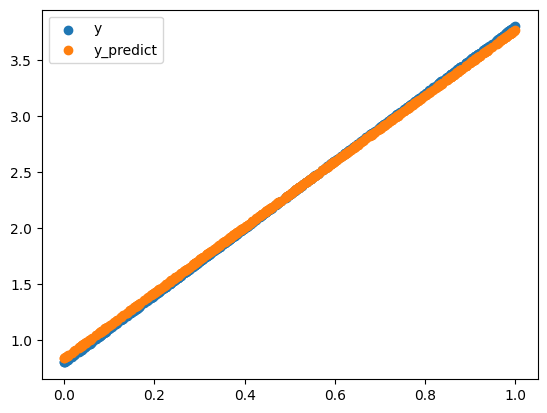

In [ ]:
#pytorch线性回归
import torch
import numpy as np
import matplotlib.pyplot as plt
#1准备数据
#y = 3x+0.8
x = torch.rand([500,1])
y = 3*x + 0.8
#img = plt.scatter(x.numpy(),y.numpy())
#plt.show()

#2准备构建模型
w = torch.rand([1,1],requires_grad=True)
b = torch.rand([1],requires_grad=True)
learning_rate = 0.01

#4通过循环，反向传播，更新参数
for i in range(2500):
  #构建模型计算y_predict
  y_predict = torch.matmul(x,w) + b
  #3计算损失函数
  loss = (y - y_predict).pow(2).mean()

  if w.grad is not None:
    w.grad.data.zero_()
  if b.grad is not None:
    b.grad.data.zero_()
  loss.backward()
  w.data = w.data - learning_rate*w.grad.data
  b.data = b.data - learning_rate*b.grad.data

  if i%100 == 0:
    print("w,b,loss",w.item(),b.item(),loss.item())

img1 = plt.scatter(x.numpy(),y.numpy())
img2 = plt.scatter(x.numpy(),y_predict.detach().numpy())
plt.legend([img1,img2],["y","y_predict"])
plt.show()